
<h1 align=center><font size = 5>The best restaurant that suits your needs</font></h1>


<h1 align=center><font size = 2>by Carloclaudio Calvino</font></h1>

## Introduction

As part of the final project for the IBM Data Science Professional Certificate,  I have chosen to explore italian restaurants in the city of Naples.
We will classify Restaurants using different features.

## Table of Contents

1. <a href="#item1">Foursquare API Search Function</a>
2. <a href="#item2">Explore a Given Venue</a>  
3. <a href="#item3">Explore a User</a>  
4. <a href="#item4">Foursquare API Explore Function</a>  
5. <a href="#item5">Get Trending Venues</a>  

### Import necessary Libraries

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

#!conda install -c conda-forge geopy --yes 
!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
from mpl_toolkits import mplot3d

import matplotlib.pyplot as plt

print('Folium installed')
print('Libraries imported.')

     |████████████████████████████████| 102kB 8.9MB/s ta 0:00:011
Folium installed
Libraries imported.


### Define Foursquare Credentials and Version

##### Make sure that you have created a Foursquare developer account and have your credentials handy

In [3]:
CLIENT_ID = 'Z5DXYGIED5ZO4MWUGKTK4XTW3U4CXMLS05TUBPEREI0IU5BL' # your Foursquare ID
CLIENT_SECRET = 'ZTVUCTNTEFBIONGV4AKGWM3WAGCS2JXTIIDMJIUHT2BK4P4I' # your Foursquare Secret

#CLIENT_ID ='4TDXZGXTR21R5V43CUWJSQ50CQRTUMR1LPV4AMEXVHPLT1MO'
#CLIENT_SECRET='5OIERUE34PCHJWDA35SGGW3M2FQR2XAGXRT3P0L5B4PZOI3Y'

#CLIENT_ID='U5FMMNBVSW20LPAR3S3RLUOWE5TJDKXGHPHWJTW55P0M1BKT'
#CLIENT_SECRET='NCEY2APSRD2IH5VDJJTG3TFLOOXKVJNAHEYYE3CZ0AEMSIYD'

VERSION = '20180604'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: Z5DXYGIED5ZO4MWUGKTK4XTW3U4CXMLS05TUBPEREI0IU5BL
CLIENT_SECRET:ZTVUCTNTEFBIONGV4AKGWM3WAGCS2JXTIIDMJIUHT2BK4P4I


#### Let's assume that you are staying at the Hotel Palazzo Turchini. So let's start by converting the Hotel's address to its latitude and longitude coordinates.

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>foursquare_agent</em>, as shown below.

In [4]:
address = 'Hotel Palazzo Turchini, Napoli'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)


40.841151 14.2526616014624


#### We will search for Restaurants within 1.4Km from the Hotel.

In [5]:
#EXPLORE
#search_query = 'Ristorante'
radius = 1400
LIMIT=99
cat_id = '4bf58dd8d48988d110941735'  # Italian Restaurants
#url = """https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}
#        &ll={},{}&v={}&radius={}&limit={}&query={}&price=1,2,3,4
#        """.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT, search_query)


url = """https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}
        &ll={},{}&v={}&radius={}&limit={}&categoryId={}&price=1,2,3,4
        """.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT, cat_id)
print(url)



https://api.foursquare.com/v2/venues/explore?client_id=Z5DXYGIED5ZO4MWUGKTK4XTW3U4CXMLS05TUBPEREI0IU5BL&client_secret=ZTVUCTNTEFBIONGV4AKGWM3WAGCS2JXTIIDMJIUHT2BK4P4I
        &ll=40.841151,14.2526616014624&v=20180604&radius=1400&limit=99&categoryId=4bf58dd8d48988d110941735&price=1,2,3,4
        


In [6]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [7]:
results = requests.get(url).json()
#print("results: "+str(results))
items = results['response']['groups'][0]['items']
#print("items : "+str(items))
dataframe = json_normalize(items) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories','venue.distance'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']

dataframe_filtered = dataframe.loc[:, filtered_columns]
#print(dataframe_filtered)
# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

#dataframe_filtered.head(10)
print(dataframe_filtered.shape)
dataframe_filtered


(99, 17)


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,name,categories,distance,address,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,postalCode,crossStreet,neighborhood,id
0,Osteria da Antonio,Italian Restaurant,NaN,Via Depretis 143,40.839877,14.253767,"[{'label': 'display', 'lat': 40.839877, 'lng':...",169,IT,Napoli,Campania,Italia,"[Via Depretis 143, Napoli Campania, Italia]",NaN,NaN,NaN,4e26be44d16486291ba2bb78
1,Trattoria Da Nennella,Italian Restaurant,NaN,"Lungo Teatro Nuovo, 105",40.841990,14.248700,"[{'label': 'display', 'lat': 40.84199, 'lng': ...",346,IT,Napoli,Campania,Italia,"[Lungo Teatro Nuovo, 105, 80100 Napoli Campani...",80100,NaN,NaN,4b8ed082f964a520cc3833e3
2,Antica Capri,Italian Restaurant,NaN,"Via Speranzella, 110",40.841940,14.247890,"[{'label': 'display', 'lat': 40.84194, 'lng': ...",411,IT,Napoli,Campania,Italia,"[Via Speranzella, 110, 80132 Napoli Campania, ...",80132,NaN,NaN,4f4947d6e4b0a644edb8a3f4
3,Antica Hosteria Toledo,Italian Restaurant,NaN,"Vico Giardinetto, 78A",40.840922,14.248122,"[{'label': 'display', 'lat': 40.84092183043966...",383,IT,Napoli,Campania,Italia,"[Vico Giardinetto, 78A, 80133 Napoli Campania,...",80133,NaN,NaN,4c5ac263f346c9281cbb4fca
4,Gambrinus,Café,NaN,Piazza Trieste e Trento,40.836840,14.248689,"[{'label': 'display', 'lat': 40.836839647962, ...",585,IT,Napoli,Campania,Italia,"[Piazza Trieste e Trento, 80132 Napoli Campani...",80132,NaN,NaN,4bd847eedc4b9521deb97888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Attori e Spettatori,Italian Restaurant,NaN,"Via Santa Lucia, 21",40.833508,14.250059,"[{'label': 'display', 'lat': 40.83350767784247...",878,IT,Napoli,Campania,Italia,"[Via Santa Lucia, 21, Napoli Campania, Italia]",NaN,NaN,NaN,4ec9727b0e6158ba00e6760d
95,Cannabistró,Italian Restaurant,NaN,Via Vincenzo Bellini 13,40.850416,14.250163,"[{'label': 'display', 'lat': 40.85041554480925...",1052,IT,Napoli,Campania,Italia,"[Via Vincenzo Bellini 13 (Via Carlo Doria), 80...",80135,Via Carlo Doria,NaN,56141e17498e131e3b37dfd0
96,Nam 43,Italian Restaurant,NaN,NaN,40.850845,14.251897,"[{'label': 'display', 'lat': 40.850845, 'lng':...",1081,IT,Napoli,Campania,Italia,"[80138 Napoli Campania, Italia]",80138,NaN,NaN,592b0169da2e0026b1367535
97,Al Duomo,Italian Restaurant,NaN,NaN,40.848549,14.261735,"[{'label': 'display', 'lat': 40.84854871865701...",1123,IT,NaN,NaN,Italia,[Italia],NaN,NaN,NaN,53d7f14a498eb92b7eb54002


#### Let's see where are located the hotels 

In [13]:
def is_restaurant(categories):
    no_restaurants = ['café', 'pizza', 'wine bar', 'desserts']
    restaurant = True
    for c in categories:
        #print (c['shortName'])
        category_shortname = c['shortName'].lower()
        #print(category_shortname)
        if category_shortname in no_restaurants:
            return False
    return restaurant

In [8]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Conrad Hotel',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=3,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

<a id="item1"></a>

#### For each venue, we will get all the details

In [9]:
def getDetailVenues (mioid):
    
    venues_list=[]
    i=0
    a=CLIENT_ID
    b=CLIENT_SECRET
    for venue_id  in mioid:
       #print(name)
            
        # create the API request URL
        i=i+1
        if i==50:

            a ='4TDXZGXTR21R5V43CUWJSQ50CQRTUMR1LPV4AMEXVHPLT1MO'
            b='5OIERUE34PCHJWDA35SGGW3M2FQR2XAGXRT3P0L5B4PZOI3Y'

           # a ='U5FMMNBVSW20LPAR3S3RLUOWE5TJDKXGHPHWJTW55P0M1BKT'
           # b='NCEY2APSRD2IH5VDJJTG3TFLOOXKVJNAHEYYE3CZ0AEMSIYD'
      #  print(i)
      #  print(a)
       # print(b)

            
        url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(
            venue_id, a, b, VERSION)        

            
        # make the GET request
        result = requests.get(url).json()
        #print(result)
        nome= result['response']['venue']['name']
        print(nome)
      #  dist= result['response']['venue']['distance']
        lati= result['response']['venue']['location']['lat']
        longi=result['response']['venue']['location']['lng']

        if 'rating' in result['response']['venue']:
            rating=result['response']['venue']['rating']
        else:
            rating='NA'
            
        if 'price' in result['response']['venue']:
            price=result['response']['venue']['price']['tier']
        else:
            price='NA'
        if 'likes' in result['response']['venue']:
            likes=result['response']['venue']['likes']['count']
        else:
            likes='0'

        if is_restaurant(result['response']['venue']['categories']):
            print("Ristorante!")
            # return only relevant information for each nearby venue
            venues_list.append([
                nome,
                lati,
                longi,
            #    dist,
                rating,
                price,
                likes
                ])
    miodt=pd.DataFrame(venues_list)
  # nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    miodt.columns=[
                 'venue', 
                 'latit', 
                'longit',
               # 'distance',
                'rating',
                'price',
                'likes'

        ]
    
 #  return(nearby_venues)
    return (miodt)

In [10]:
naples_venues = getDetailVenues(mioid=dataframe_filtered['id']    )
#print("hi")

Osteria da Antonio


NameError: name 'is_restaurant' is not defined

In [12]:
# To save data
import pickle
with open('restaur_nap_nofil.pkl', 'wb') as f:
        pickle.dump(naples_venues, f)
        
        

In [11]:
#To load data
import pickle
with open('restaur_nap.pkl', 'rb') as f:
        naples_venues=pickle.load( f)
        

#### This is our starting dataset

In [12]:
naples_venues

,venue,latit,longit,rating,price,likes
0,Osteria da Antonio,40.839877,14.253767,8.1,3,45
1,Trattoria Da Nennella,40.841990,14.248700,8.3,1,336
2,Antica Capri,40.841940,14.247890,8.2,3,56
3,Antica Hosteria Toledo,40.840922,14.248122,7.9,3,33
4,L'Angolino,40.842091,14.251549,7.6,3,8
...,...,...,...,...,...,...
61,Cantanapoli,40.830402,14.247580,5.7,3,3
62,Cannabistró,40.850416,14.250163,NA,3,3
63,Nam 43,40.850845,14.251897,NA,3,2
64,Al Duomo,40.848549,14.261735,NA,3,2


#### Let's apply Data Cleaning...

In [13]:
naples_venues.dtypes

venue      object
latit     float64
longit    float64
rating     object
price       int64
likes       int64
dtype: object

In [14]:
canc = naples_venues[ naples_venues['rating'] == 'NA' ].index
#print(canc)

naples_venues.drop(canc, inplace=True)

In [15]:
naples_venues=naples_venues.astype({'rating': 'float64'})

In [16]:
naples_venues=naples_venues.astype({'likes': 'int64'})

#### This is our final dataset

In [17]:
naples_venues

,venue,latit,longit,rating,price,likes
0,Osteria da Antonio,40.839877,14.253767,8.1,3,45
1,Trattoria Da Nennella,40.841990,14.248700,8.3,1,336
2,Antica Capri,40.841940,14.247890,8.2,3,56
3,Antica Hosteria Toledo,40.840922,14.248122,7.9,3,33
4,L'Angolino,40.842091,14.251549,7.6,3,8
5,Ristorante Al 53,40.848668,14.250226,8.7,3,13
6,La Taverna del Buongustaio,40.845971,14.248833,8.0,3,11
7,Valù,40.840765,14.248052,7.6,3,22
8,Tandem,40.848313,14.256405,8.5,3,151
9,Ristorante La locanda del nero,40.840900,14.246950,7.6,3,5


#### Let'see them on map

In [18]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Hotel',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(naples_venues.latit, naples_venues.longit, naples_venues.venue):
    folium.features.CircleMarker(
        [lat, lng],
        radius=3,
        color='blue',
        popup=folium.Popup(label, parse_html=True),
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

#### Now we will examine each feature, to understand data distribution

In [58]:
naples_venues['rating'].describe()

count    55.000000
mean      7.212727
std       0.670835
min       5.700000
25%       6.700000
50%       7.300000
75%       7.600000
max       8.700000
Name: rating, dtype: float64

Text(0, 0.5, 'Count')

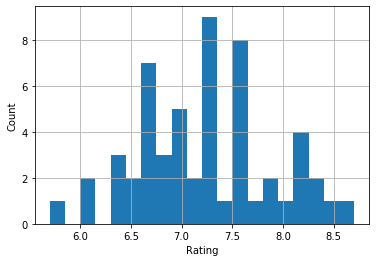

In [20]:
import matplotlib.pyplot as plt
naples_venues['rating'].hist(bins=20)
plt.xlabel('Rating')
plt.ylabel('Count')

#### For price, 1=cheapest, 4= the most expensive

In [21]:
naples_venues['price'].describe()

count    55.000000
mean      2.909091
std       0.348155
min       1.000000
25%       3.000000
50%       3.000000
75%       3.000000
max       3.000000
Name: price, dtype: float64

Text(0, 0.5, 'Count')

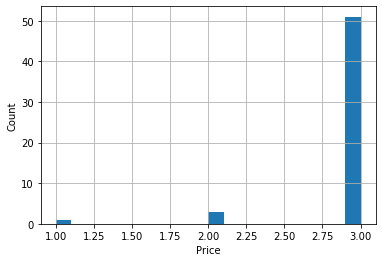

In [60]:
import matplotlib.pyplot as plt
naples_venues['price'].hist(bins=20)
plt.xlabel('Price')
plt.ylabel('Count')

In [23]:
naples_venues['likes'].describe()

count     55.000000
mean      27.400000
std       48.343141
min        2.000000
25%        8.000000
50%       13.000000
75%       31.000000
max      336.000000
Name: likes, dtype: float64

Text(0, 0.5, 'Count')

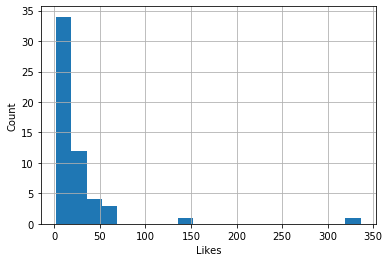

In [61]:
import matplotlib.pyplot as plt
naples_venues['likes'].hist(bins=20)
plt.xlabel('Likes')
plt.ylabel('Count')

#### We will now select only the features of interest from the final dataset

In [24]:
naples_venues.dtypes

venue      object
latit     float64
longit    float64
rating    float64
price       int64
likes       int64
dtype: object

In [25]:
df=naples_venues.copy()
df = df.drop(['venue','latit','longit'],axis=1)
df.head(10)

,rating,price,likes
0,8.1,3,45
1,8.3,1,336
2,8.2,3,56
3,7.9,3,33
4,7.6,3,8
5,8.7,3,13
6,8.0,3,11
7,7.6,3,22
8,8.5,3,151
9,7.6,3,5


#### The feature 'likes' has a data range different from the others, and is not good for ML Alghoritms.
#### So we apply a normalization

In [26]:
df["likes"] = 10*(df["likes"]/ df["likes"].max())

In [33]:
df

,rating,price,likes
0,8.1,3,1.339286
1,8.3,1,10.000000
2,8.2,3,1.666667
3,7.9,3,0.982143
4,7.6,3,0.238095
5,8.7,3,0.386905
6,8.0,3,0.327381
7,7.6,3,0.654762
8,8.5,3,4.494048
9,7.6,3,0.148810


#### Now we use KMeans alghorithm to classify. Let's suppose to have 5 different classes

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
from sklearn import metrics
#cluster_dataset = StandardScaler().fit_transform(df)
#cluster_dataset

num_clusters = 5

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12, random_state=1)
k_means.fit(df)
labels = k_means.labels_

print(labels)

[3 2 3 3 1 1 1 1 4 1 3 1 1 1 3 3 1 0 0 0 1 3 1 1 3 1 1 0 3 1 0 1 1 1 0 1 1
 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0]


#### Let's add labels to previous Dataframes

In [45]:
#k_means.cluster_centers_

In [47]:
df["labels"] = labels
naples_venues["labels"] = labels

In [63]:
naples_venues

,venue,latit,longit,rating,price,likes,labels
0,Osteria da Antonio,40.839877,14.253767,8.1,3,45,3
1,Trattoria Da Nennella,40.841990,14.248700,8.3,1,336,2
2,Antica Capri,40.841940,14.247890,8.2,3,56,3
3,Antica Hosteria Toledo,40.840922,14.248122,7.9,3,33,3
4,L'Angolino,40.842091,14.251549,7.6,3,8,1
5,Ristorante Al 53,40.848668,14.250226,8.7,3,13,1
6,La Taverna del Buongustaio,40.845971,14.248833,8.0,3,11,1
7,Valù,40.840765,14.248052,7.6,3,22,1
8,Tandem,40.848313,14.256405,8.5,3,151,4
9,Ristorante La locanda del nero,40.840900,14.246950,7.6,3,5,1


#### Let'see average values for each group

<a id="item2"></a>

In [62]:
df.groupby('labels').mean()

,rating,price,likes
labels,,,
0,6.595652,2.956522,0.432195
1,7.545000,2.950000,0.366071
2,8.300000,1.000000,10.000000
3,7.730000,2.900000,1.309524
4,8.500000,3.000000,4.494048


#### The following conclusions apply:
Group 2 has an high rating, a very low price, and a lot of likes. This should be the restaurant with the best price/quality ratio.

Group 4 has a high rating, but also the price is high.

Group 3 has a medium/high rating, with an high price. Likes are few.

Group 1 has a medium rating, it is worse than group 3 from all  points of view.

Group 0 has a low rating, high price, and minimal number of likes. This the worst group

The conclusion is that the most interesting Restaurants are inside group 2,4,3


#### Let's see wich hotels belong to group 2

In [50]:
naples_venues[naples_venues.labels == 2]

,venue,latit,longit,rating,price,likes,labels
1,Trattoria Da Nennella,40.84199,14.2487,8.3,1,336,2


#### Let'see wich hotels belong to group 4

In [51]:
naples_venues[naples_venues.labels == 4]

,venue,latit,longit,rating,price,likes,labels
8,Tandem,40.848313,14.256405,8.5,3,151,4


#### Let'see wich hotels belong to group 3

In [52]:
naples_venues[naples_venues.labels == 3]

,venue,latit,longit,rating,price,likes,labels
0,Osteria da Antonio,40.839877,14.253767,8.1,3,45,3
2,Antica Capri,40.841940,14.247890,8.2,3,56,3
3,Antica Hosteria Toledo,40.840922,14.248122,7.9,3,33,3
10,Castel Nuovo,40.839947,14.254708,7.3,3,48,3
14,Grangusto,40.843709,14.258323,7.3,3,61,3
15,Muu Muuzzarella Lounge,40.835264,14.241309,8.3,2,32,3
21,Zio Jack,40.831186,14.249315,7.9,3,33,3
24,Terrazza Calabritto,40.833002,14.241643,8.1,3,30,3
28,Campagnola,40.850684,14.256297,7.5,3,38,3
45,Regina Margherita,40.830075,14.245142,6.7,3,64,3


The most interesting are : "Muu Muuzzarella Lounge", "Osteria da Antonio" , "Antica Capri", "Zio Jack", "Terrazza Calabritto", "Antica Hosteria Toledo"

#### Let'see wich hotels belong to group 1

In [53]:
#df[df.labels == 0]
naples_venues[naples_venues.labels == 1]

,venue,latit,longit,rating,price,likes,labels
4,L'Angolino,40.842091,14.251549,7.6,3,8,1
5,Ristorante Al 53,40.848668,14.250226,8.7,3,13,1
6,La Taverna del Buongustaio,40.845971,14.248833,8.0,3,11,1
7,Valù,40.840765,14.248052,7.6,3,22,1
9,Ristorante La locanda del nero,40.840900,14.246950,7.6,3,5,1
11,Amici Miei,40.835147,14.245276,8.2,3,10,1
12,Il Garum,40.845060,14.250420,7.4,3,19,1
13,Locanda N'Tretella,40.836770,14.246800,7.6,3,13,1
16,'O Vesuvio,40.839354,14.247463,7.2,3,11,1
20,Antichi Sapori,40.833431,14.250001,7.5,3,11,1


These Restaurants have been penalized for the low amount of likes.
However "Ristorante Al 53" or "Amici miei" could be interesting.

#### Let'see wich hotels belong to group 0

In [54]:
#df[df.labels == 0]
naples_venues[naples_venues.labels == 0]

,venue,latit,longit,rating,price,likes,labels
17,Il Comandante,40.840612,14.255733,7.0,3,8,0
18,Il Pomodorino,40.838251,14.250807,7.1,3,28,0
19,A Taverna do Re,40.839804,14.254030,6.9,3,8,0
27,La Locanda dei Borboni,40.839636,14.247994,6.9,3,10,0
30,Il Pomodorino,40.843911,14.256040,6.8,3,40,0
34,La Cantina del Sole,40.848612,14.255949,7.0,3,8,0
37,Tandem Steak,40.844901,14.256067,6.6,3,17,0
38,Tandem,40.846176,14.251351,6.6,3,6,0
39,Leon d'Oro,40.848776,14.250094,6.8,3,9,0
40,La Cantinella,40.832196,14.251219,6.8,3,10,0


They don't seem apparently to be interesting.

#### And now, the final result!

In [57]:

map_naples_class = folium.Map(location=[latitude, longitude], zoom_start=13)
# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Hotel',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(map_naples_class)

for lat, lng, label,name in zip(naples_venues.latit, naples_venues.longit, naples_venues.labels, naples_venues.venue):
    if label==0:
        colore='blue'
    elif label==1:
        colore='green'
    elif label==2:
        colore='red'
    elif label==3:
        colore='brown'
    elif label==4:
        colore='orange'
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color=colore,
        popup=folium.Popup(name, parse_html=True),
        fill = True,
       # fill_color='blue',
        fill_opacity=0.6
    ).add_to(map_naples_class)
map_naples_class